 # Cardiovascular Diseases - Heart Failure Prediction
    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives 
   each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk 
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and 
   management wherein a machine learning model can be of great help.
    
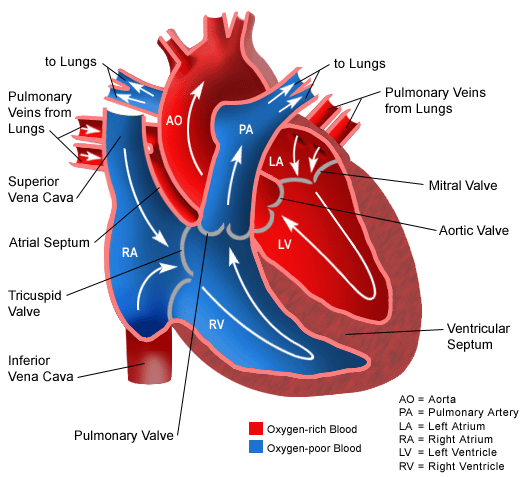
    
 ## Dataset Link 
 
 https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
 
 ## Dataset Description
 
 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**
 
 ### References
 
    Machine learning can predict survival of patients with heart failure from serum creatinine and 
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### Install Required Libraries

In [ ]:
# We want to display the plotly charts in the staic png format as well (so that github renders and displays
# the charts correctly in the view mode). Since this rendering and export requires the Kaleido package engine 
# to be installed, lets go ahead and install the package prior to beginning of the Exploratory Data Analysis.

# If the Kaleido engine is not installed the following error will be raised on executing the following line - 
# fig.show("png")
# Raise informative error message if Kaleido is not installed. 
# Image export using the "kaleido" engine requires the kaleido package, which can be installed using  pip:   

!pip install -U kaleido

### Required Libraries and Utilities

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
from scipy.stats import randint 
from collections import Counter

import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.formula.api import ols

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj
import plotly.figure_factory as ff

### Set Notebook Configuration Parameters 

In [4]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# inline plotting with the Jupyter Notebook
init_notebook_mode(connected=True)

### Utility Functions

In [ ]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

In [ ]:
def InsertChartSeparator():
    
    """Inserts a separator to demarcate between the dynamic interactive chart
    and the corresponding static chart in the png format."""
    
    print("                             ****************  STATIC PNG FORMAT  ****************")

### Import Data

In [ ]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = 'heart_failure_clinical_records_dataset.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

In [ ]:
heart_faliure_data.shape

In [ ]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

***This looks to be a clean dataset without any missing values...***

## Exploratory Data Analysis

Lets look at the features available to us.

### 1. Univariate Analysis of Categorical variables

#### 'anaemia', 
#### 'high_blood_pressure', 
#### 'diabetes', 
#### 'sex', 
#### 'smoking'

In [ ]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((heart_faliure_data[col_list].value_counts(dropna = False))/
                    (len(heart_faliure_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

#### <font color = brown>Data Insight 1:</font>

**`1. ~57% of the population under study have aneamic symptoms while ~43% are non-aneamic.`**

**`2. ~65% of the population have hypertension or high bloob pressure while ~35% have normal blood pressure.`**

**`3. ~58% of the population are diabetic while ~42% are non-diabetic.`**

**`4. ~65% of the population are male while ~35% are female.`**

**`5. ~68% of the population have smoking habits while ~32% are non-smokers.`**

### 2. Distribution of Age

In [ ]:
colors = ['rgb(0, 0, 100)']

fig = ff.create_distplot(hist_data = [heart_faliure_data["age"].values], group_labels = ['age'], 
                         colors = colors, bin_size=2)

fig.update_layout(title_text='Distribution of Age')

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 2:</font>

**`1. The age group of people ranges from 40 - 95 with visible spike in the population density at certain age intervals around  [44-46], [50-52], [60-62] (highest density), [64-66], [70-72].`**

### 3. Distribution of Age w.r.t Gender

In [ ]:
# Notched box plots apply a "notch" or narrowing of the box around the median. 
# Notches are useful in offering a rough guide to significance of difference of medians; 
# if the notches of two boxes do not overlap, this offers evidence of a statistically significant 
# difference between the medians. Ref - https://en.wikipedia.org/wiki/Box_plot#Variations

fig = px.box(heart_faliure_data, x = 'sex', y = 'age', points = "all", hover_name = 'sex', 
             color = 'sex', notched=True)

fig.update_layout(title_text="Distribution of Age, Gender Wise - Male: 1, Female: 0")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 3:</font>

**`1. The minimum age is 40 for both Males and Female.`**

**`2. The maximum age is 95 for Male population and for female population the maximum age is 90 for the population being studied.`** 

### 4. Effect of Age on the Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

<i>`People age 65 and older are much more likely than younger people to suffer a heart attack, stroke, or to develop coronary heart disease and heart failure. Aging can cause changes in the heart and blood vessels. A major cause of heart disease is the buildup of fatty deposits in the walls of arteries over many years.`

`The most common aging change is increased stiffness of the large arteries, called arteriosclerosis, or hardening of the arteries. This causes high blood pressure, or hypertension, which becomes more common as we age.` </i> [1]

However, younger people can also be a victim of heart failure. This can happen depending on various factors or lifestyle, exercixe habits, smoking and drinking habits, food habits, other underlying medical conditions hypertension, diabetes and obesity, etc. [2]


Ref -

[1] https://www.nia.nih.gov/health/heart-health-and-aging

[2] https://health.clevelandclinic.org/heart-failure-before-age-65-how-does-it-happen/

In [ ]:
survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["age"]
not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["age"]

In [ ]:
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [survived, not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1], colors = colors)
fig.update_layout(title_text = "Effect of Age on the Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 4:</font>

**`1. The survival rate is more within the age group 50 to 70.`**

**`2. The chances of not surviving the event of a heart failure happens around all the age group in the population being studied. This is highest around the 60's age group. Above the age of 80, the chances of survival decreases drsatically.`**

**`3. The above numbers could be mostly due the lifestyle and the eating habits of the population. A better active lifestyle would increase the chances of surviving the event of a hheart failure.`**

### 5. Survival Rate w.r.t Gender

####  <font color = brown>Medical/Biological Significance:</font>

In the study **`"Gender and heart failure: a population perspective"`**, the authors with their research and findings state that <i>`"The incidence and prevalence of heart failure is lower in women than in men at all ages. However, due to the steep increase in incidence with age, and the proportionally larger number of elderly women in the populations of the developed world, the total number of men and women living with heart failure is similar.`"</i> [1]

Ref -

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1860739/

In [ ]:
male = heart_faliure_data[heart_faliure_data["sex"] == 1]
female = heart_faliure_data[heart_faliure_data["sex"] == 0]

male_survived = male[heart_faliure_data["DEATH_EVENT"] == 0]
male_not_survived = male[heart_faliure_data["DEATH_EVENT"] == 1]
female_survived = female[heart_faliure_data["DEATH_EVENT"] == 0]
female_not_urvived = female[heart_faliure_data["DEATH_EVENT"] == 1]

In [ ]:
# pie chart
labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not_survived), len(female_survived),len(female_not_urvived)]

pie = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0.1])])
pie.update_layout(title_text="Survival Rate w.r.t Gender")


# show the interactive view
pie.show()

InsertChartSeparator()
# export to a png rendered format of the chart
pie.show("png")

#### <font color = brown>Data Insight 5:</font>

**`1. From the above pie chart it is evident that 44.1% (132) of the male population have survived while 20.7% (62) succumbed to the heart failure.`**

**`2. Coming to the female population, 23.7% (71) of the population survived the heart failure while 11.4% (34) succumbed to the heart failure.`**

### 6. Effect of High Blood Pressure (Hypertension) on Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

<i>`"Heart failure, a condition where your heart is unable to provide enough blood to the body, can take years to develop inside your body. The narrowing and blocking of blood vessels caused by high blood pressure (HBP or hypertension) increases your risk of developing heart failure.`

`High blood pressure adds to your heart’s workload: Narrowed arteries that are less elastic make it more difficult for the blood to travel smoothly and easily throughout your body — causing your heart to work harder.`
 
`Over time, a higher workload leads to an enlarged heart: In order to cope with increased demands, the heart thickens and becomes larger. While it is still able to pump blood, it becomes less efficient. The larger the heart becomes, the harder it works to meet your body's demands for oxygen and nutrients."`</i> [1]

Ref -

[1] https://www.heart.org/en/health-topics/high-blood-pressure/health-threats-from-high-blood-pressure/how-high-blood-pressure-can-lead-to-heart-failure

In [ ]:
hypertension_yes = heart_faliure_data[heart_faliure_data['high_blood_pressure']==1]
hypertension_no = heart_faliure_data[heart_faliure_data['high_blood_pressure']==0]

hypertension_yes_survived = hypertension_yes[heart_faliure_data["DEATH_EVENT"] == 0]
hypertension_yes_not_survived = hypertension_yes[heart_faliure_data["DEATH_EVENT"] == 1]
hypertension_no_survived = hypertension_no[heart_faliure_data["DEATH_EVENT"] == 0]
hypertension_no_not_survived = hypertension_no[heart_faliure_data["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Hypertension Distribution', 'Hypertension & SR'])

labels1 = ["Hypertension YES","Hypertension NO"]
values1 = [len(hypertension_yes), len(hypertension_no)]

labels2 = ['Hypertension YES - Survived','Hypertension  YES - Not Survived', 'Hypertension NO - Survived',
           'Hypertension  NO - Not Survived']
values2 = [len(hypertension_yes_survived), len(hypertension_yes_not_survived),
          len(hypertension_no_survived), len(hypertension_no_not_survived)]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Hypertension"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Hypertension & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hypertension Distribution & Survival Rate (SR)")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 6:</font>

**`1. Out of the total population, around 35% of then suffer of high blood pressure or hypertension.`**

**`2. Amongst these 35% population, 22% survived the event of a heart failure while 13% succumbed to the condition.`**

**`3. Amongst the 65% population that do not have hypertension, 45.8% survived the event of a heart failure while 19% succumbed to the condition.`**

### 7. Effect of Diabetes on Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

In the study **`"Heart Failure in Patients with Diabetes Mellitus"`**, authors state that <i>`Diabetes and heart failure are closely related: patients with diabetes have an increased risk of developing heart failure and those with heart failure are at higher risk of developing diabetes.`</i>

<i>`"Diabetes mellitus is highly prevalent amongst patients with heart failure, especially those with heart failure and preserved ejection fraction, and patients with the two conditions have a higher risk of mortality compared with patients without diabetes or heart failure. Diabetic patients have an increased risk of developing heart failure because of the abnormal cardiac handling of glucose and free fatty acids"`</i> [1]

Another study **`"Heart Failure in Type 2 Diabetes Mellitus"`** says, <i>`"Heart Failure Risk Is Significantly Increased in Diabetes Mellitus"`</i> [2]

Ref -

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5494155/

[2] https://www.ahajournals.org/doi/10.1161/CIRCRESAHA.118.311371

In [ ]:
diabetes_yes = heart_faliure_data[heart_faliure_data['diabetes']==1]
diabetes_no = heart_faliure_data[heart_faliure_data['diabetes']==0]

diabetes_yes_survived = diabetes_yes[heart_faliure_data["DEATH_EVENT"] == 0]
diabetes_yes_not_survived = diabetes_yes[heart_faliure_data["DEATH_EVENT"] == 1]
diabetes_no_survived = diabetes_no[heart_faliure_data["DEATH_EVENT"] == 0]
diabetes_no_not_survived = diabetes_no[heart_faliure_data["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Diabetes Distribution', 'Diabetes and Survival Rate'])

labels1 = ["Diabetes YES", "Diabetes NO"]
values1 = [len(diabetes_yes), len(diabetes_no)]

labels2 = ['Diabetes YES - Survived','Diabetes  YES - Not Survived', 'Diabetes NO - Survived',
           'Diabetes  NO - Not Survived']
values2 = [len(diabetes_yes_survived), len(diabetes_yes_not_survived),
          len(diabetes_no_survived), len(diabetes_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Diabetes"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Diabetes & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Diabetes Distribution and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 7:</font>

**`1. Out of the total population, ~42% of the people have deibetes while ~58% do not have diabetes. `**

**`2. Of the people who have deibetes, 28.4% of the population survived the event of a heart failure while 13.4% people succumbed to the condition.`**

**`3. Of the people who do not have deibetes, 39.5% of the population survived the event of a heart failure while 18.7% people succumbed to the condition.`**

### 8. Effect of Smoking on Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

<i>`Smoking is a major risk factor for ischemic heart disease, a condition in which plaque builds up inside the coronary arteries. These arteries supply your heart muscle with oxygen-rich blood. When plaque builds up in the arteries, the condition is called atherosclerosis.`

`Plaque narrows the arteries and reduces blood flow to your heart muscle. The buildup of plaque also makes it more likely that blood clots will form in your arteries. Blood clots can partially or completely block blood flow.`

`Over time, smoking contributes to atherosclerosis and increases your risk of having and dying from heart disease, heart failure, or a heart attack.`</i> [1]


Ref - 

[1] https://www.nhlbi.nih.gov/health-topics/smoking-and-your-heart

In [ ]:
smoking_yes = heart_faliure_data[heart_faliure_data['smoking']==1]
smoking_no = heart_faliure_data[heart_faliure_data['smoking']==0]

smoking_yes_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 0]
smoking_yes_not_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 1]
smoking_no_survived = smoking_no[smoking_no["DEATH_EVENT"] == 0]
smoking_no_not_survived = smoking_no[smoking_no["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Smoking Distribution', 'Smoking and Survival Rate'])

labels1 = ["Smoking YES", "Smoking NO"]
values1 = [len(smoking_yes), len(smoking_no)]

labels2 = ['Smoking YES - Survived','Smoking  YES - Not Survived', 'Smoking NO - Survived',
           'Smoking  NO - Not Survived']
values2 = [len(smoking_yes_survived), len(smoking_yes_not_survived),
          len(smoking_no_survived), len(smoking_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Smoking"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Smoking & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Smoking Distribution and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 8:</font>

**`1. Out of the total population, ~32% of the people have smoking habits while ~68% do not have any smoking habits. `**

**`2. Of the people who smoke, 22.1% of the population survived the event of a heart failure while 10% people succumbed to the condition.`**

**`3. Of the people who do not have smoking habits, 45.8% of the population survived the event of a heart failure while 22.1% people succumbed to the condition.`**

### 9. Effect of Anaemia on Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

Decrease of red blood cells or hemoglobin.

<i>`Anaemia is a condition in which the number of red blood cells or the haemoglobin concentration within them is lower than normal. Haemoglobin is needed to carry oxygen and if you have too few or abnormal red blood cells, or not enough haemoglobin, there will be a decreased capacity of the blood to carry oxygen to the body’s tissues. This results in symptoms such as fatigue, weakness, dizziness and shortness of breath, among others.`</i> [1]

<i>`Anemia is common in patients with heart failure, and is a multifactorial and multidimensional problem.1 There has been increasing appreciation of the significance of anemia in the pathophysiology, treatment, and prognosis of heart failure.`</i> [2]

Ref - 

[1] https://www.who.int/health-topics/anaemia#tab=tab_1

[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3569049/

In [ ]:
anaemia_yes = heart_faliure_data[heart_faliure_data['anaemia']==1]
anaemia_no = heart_faliure_data[heart_faliure_data['anaemia']==0]

anaemia_yes_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 0]
anaemia_yes_not_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 1]
anaemia_no_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 0]
anaemia_no_not_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Anaemia Distribution', 'Anaemia and Survival Rate'])

labels1 = ["Anaemia YES", "Anaemia NO"]
values1 = [len(anaemia_yes), len(anaemia_no)]

labels2 = ['Anaemia YES - Survived','Anaemia  YES - Not Survived', 'Anaemia NO - Survived',
           'Anaemia  NO - Not Survived']
values2 = [len(anaemia_yes_survived), len(anaemia_yes_not_survived),
          len(anaemia_no_survived), len(anaemia_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Anaemia"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Anaemia & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Anaemia Distribution and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 9:</font>

**`1. Out of the total population, ~43.1% of the people have Anaemia observed while ~56.9% do not have any Anaemia synmtoms. `**

**`2. Of the people who have anaemia, 27.8% of the population survived the event of a heart failure while 15.4% people succumbed to the condition.`**

**`3. Of the people who do not have anaemia, 40.1% of the population survived the event of a heart failure while 16.7% people succumbed to the condition.`**

### Quantitative Variables

#### creatinine_phosphokinase

#### ejection_fraction

#### platelets

#### serum_creatinine

#### serum_sodium

### 10. Creatinine Phosphokinase w.r.t Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

<i>**Creatine phosphokinase (CPK)** is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain. 
    
- The CPK normal range in males is between `39 – 308 U/L`. (Ref - [1] & [3])
- The CPK normal range in females the CPK normal range is between `26 – 192 U/L`. (Ref - [1] & [3])

This test may be used to: [1]

- Diagnose heart attack
- Evaluate cause of chest pain
- Determine if or how badly a muscle is damaged
- Detect dermatomyositis, polymyositis, and other muscle diseases
- Tell the difference between malignant hyperthermia and postoperative infection

Heart failure conditions relate to an elevated level of the APK enzyme. [2] </i>


Ref - 

[1] https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test

[2] https://www.mendelian.co/symptoms/congestive-heart-failure-and-elevated-serum-creatine-phosphokinase

[3] https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/

In [ ]:
# Distribution of the CPK enzyme levels in the case of SURVIVAL and DEATH events

fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "creatinine_phosphokinase", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Level of the CPK enzyme in the blood")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
cpk_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["creatinine_phosphokinase"]
cpk_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["creatinine_phosphokinase"]

In [ ]:
# Distribution of the CPK enzyme levels in the case of SURVIVAL and DEATH events

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [cpk_survived, cpk_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[50, 50], colors = colors)
fig.update_layout(title_text = "Effect of CPK levels on the Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 10:</font>

**`1. The CPK levels for patients who did not survive the heart failure are on the higher side. Some patients show an abnormally high levels of the CPK enzyme.`**

**`2. There are some clear outliers (on the higher side) as it is observed in the violin histogram above. However, there very high values of CPK levels are present in both the events of SURVIVAL and DEATH.`**

### 11.  Ejection Fraction w.r.t Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

**Ejection fraction (EF)** is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.

Ref - https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement

In [ ]:
# Distribution of the Ejection Fraction in the case of SURVIVAL and DEATH events

fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "ejection_fraction", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Percentage of Blood leaving the left ventricle with each heartbeat...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
ef_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["ejection_fraction"]
ef_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["ejection_fraction"]

In [ ]:
# Distribution of the Ejection Fraction in the case of SURVIVAL and DEATH events

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [ef_survived, ef_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[2, 2], colors = colors)
fig.update_layout(title_text = "Effect of Ejection Fraction on Survival Rate incase of Heart Failure")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 11:</font>

**`1. Majority of the person who succumbed to the heart failure condition showed lower than normal ejection fraction values. Only 25-45 (%) of the blood was being pumped out of the heart.`**

### 12. Platelets w.r.t Survival Rate

####  <font color = brown>Medical/Biological Significance:</font>

A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called **thrombocytosis**; having less than 150,000 is known as **thrombocytopenia**. [1]


Heart failure is associated with increased risk of venous thromboembolism, stroke, and sudden death. Platelet abnormalities have been well described in heart failure but the significance of platelets in contributing to the thromboembolic complications of heart failure remains uncertain. [2]

Ref -

[1] https://www.hopkinsmedicine.org/heart_vascular_institute/centers_excellence/women_cardiovascular_health_center/women-heart-health-topics/platelets.html

[2] https://academic.oup.com/eurheartj/article/27/22/2623/2887328

[3] https://www.thrombosisresearch.com/article/S0049-3848(16)30512-6/fulltext

In [ ]:
# Distribution of the Platelets in the case of SURVIVAL and DEATH events

fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "platelets", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Ptatelet Count Distribution and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
platelet_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["platelets"]
platelet_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["platelets"]

In [ ]:
# Distribution of the Platelets in the case of SURVIVAL and DEATH events

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [platelet_survived, platelet_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[50, 50], colors = colors)
fig.update_layout(title_text = "Platelet Count v/s. Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
# Notched box plots apply a "notch" or narrowing of the box around the median. 
# Notches are useful in offering a rough guide to significance of difference of medians; 
# if the notches of two boxes do not overlap, this offers evidence of a statistically significant 
# difference between the medians. Ref - https://en.wikipedia.org/wiki/Box_plot#Variations

fig = px.box(heart_faliure_data, x = 'DEATH_EVENT', y = 'platelets', points = "all", hover_name = 'DEATH_EVENT', 
             color = 'DEATH_EVENT', notched=True)

fig.update_layout(title_text="Distribution of Platelets w.r.t Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 12:</font>

**`1. Majority of the person who succumbed to the heart failure condition have platelets count within the mormal range. There are a few cases of death where the platelet count hovers arund the lower boundary limit.`**

**`2. Some cases report abnormally high count of platelets in both the scenarios - SURVIVAL and DEATH_EVENT.`**

**`3. Thus as mentioned in [2] above, Platelet abnormalities have been well described in heart failure (which can be seen in the plots above) but the significance of platelets in contributing to the thromboembolic complications of heart failure remains uncertain.`**

**`4. There are some clear outliers as it is observed in the box plot above. These outlying values are mostly observed when the patient survived the event of a heart failure.`**

### 13. Serum Creatinine w.r.t Survival Rate 

####  <font color = brown>Medical/Biological Significance:</font>

**`Creatinine is a chemical waste product in the blood that passes through the kidneys to be filtered and eliminated in urine.`** The chemical waste is a by-product of normal muscle function. The more muscle a person has, the more creatinine they produce. Levels of creatinine in the blood reflect both the amount of muscle a person has and their amount of kidney function.

Most men with normal kidney function have approximately **`0.6 to 1.2 milligrams/deciliters (mg/dL)`** of creatinine. Most women with normal kidney function have between **`0.5 to 1.1 mg/dL`** of creatinine. Women usually have lower creatinine levels than men because women, on average, have less muscle than men. [1]

<i>"In the research study **`"Beware the rising creatinine level"`** published in the `Journal of Cardiac Failure`, the authors speak about the `increase in serum creatinine levels during heart failure` hospitalization. A similar study by the same group found elevations of `creatinine ≥ 0.3 mg/dL` during heart failure hospitalization.

The authors further go on to state an important question - `Why increased serum creatinine concentrations portend such an adverse prognosis, even after statistical adjustment for` **`age, diabetes, ejection fraction, baseline creatinine, and duration of heart failure?`** One possibility is that a reduction in renal function over a short period spurs the progression toward poor outcomes because renal dysfunction directly contributes to heart failure risk. The change in creatinine is more likely to be indicative of the severity of cardiac dysfunction rather than of acute renal damage." </i>[2]

Ref -

[1] https://www.davita.com/education/kidney-disease/symptoms/what-is-creatinine

[2] https://doi.org/10.1054/jcaf.2003.10

[3] https://doi.org/10.1093/eurheartj/ehs205

In [ ]:
print("Elevated Serum Levels and Death Cases")
print("-------------------------------------------------------------")

# Total number of death cases and the levels of serum creatinine in such cases
death_events = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]
print("Total number of death cases reported due to heart failure:", death_events.shape[0])

# Higher levels of serum - the upper limit is chosen as 1.1 as per the texts and studies cited above.
high_serum_level_deaths = death_events[death_events["serum_creatinine"] >= 1]
print("Total number of death cases with much higher serum levels:", high_serum_level_deaths.shape[0])

print("\nElevated Serum Levels and Survival Cases")
print("-------------------------------------------------------------")

# Total number of survival cases and the levels of serum creatinine in such cases
survivals = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]
print("Total number of survivals after a heart failure condition:", survivals.shape[0])

# Higher levels of serum - the upper limit is chosen as 1.1 as per the texts and studies cited above.
high_serum_level_survivals = survivals[survivals["serum_creatinine"] >= 1]
print("Total number of survivals with higher serum levels:", high_serum_level_survivals.shape[0])

#### Lets see the elevated serum levels in pie charts

In [ ]:
# create a temporary dataset to work on as we do not want to disturb the original dataset
temp = heart_faliure_data.copy()

In [ ]:
# create a new binary column 'high_serum_level' to indicate if the serum levels are on the higher side
temp['high_serum_level'] = [1 if x >= 1 else 0 for x in temp['serum_creatinine']] 

# assing the values to the new column
temp_high_serum = temp[temp["high_serum_level"] == 1]
temp_low_serum = temp[temp["high_serum_level"] == 0]

# create the temporary high and low serum levels dataset onjects to work on
high_serum_survived = temp_high_serum[temp_high_serum["DEATH_EVENT"] == 0]
high_serum_not_survived = temp_high_serum[temp_high_serum["DEATH_EVENT"] == 1]

low_serum_survived = temp_low_serum[temp_low_serum["DEATH_EVENT"] == 0]
low_serum_not_survived = temp_low_serum[temp_low_serum["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Serum Level Distribution', 'Serum and Survival Rate'])

labels1 = ["High Serum YES", "High Serum NO"]
values1 = [len(temp_high_serum), len(temp_low_serum)]

labels2 = ['High Serum YES - Survived','High Serum  YES - Not Survived', 'High Serum NO - Survived',
           'High Serum  NO - Not Survived']
values2 = [len(high_serum_survived), len(high_serum_not_survived),
          len(low_serum_survived), len(low_serum_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Serum Levels"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Serum Levels & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Blood Serum Levels and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
# Distribution of the Platelets in the case of SURVIVAL and DEATH events

fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "serum_creatinine", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Distribution of Serum Creatinine Levels and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
# total survived and death cases w.r.t overall serum levels
serum_creatinine_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["serum_creatinine"]
serum_creatinine_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["serum_creatinine"]

In [ ]:
# Distribution of the serum_creatinine in the case of SURVIVAL and DEATH events

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [serum_creatinine_survived, serum_creatinine_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.2, 0.2], colors = colors)
fig.update_layout(title_text = "Serum Creatinine Levels v/s. Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 13:</font>

**`1. Of the entire population being studied, there are 96 cases who have succumbed to the heart failure condition. Out of these 96 cases, 87 cases have reported serum levels either around the higher boundary limit or higher than the normal range. This observation is inline with the research studies cited.`**

**`2. Some cases with much elevated levels of serum creatinine survived the heart failure condition.`**

**`3. Of the entire population 72.9% cases have reported elevated levels of blood serum. While 27.1% cases have serum levels in the normal range.`**

**`4. Out of the 72.9% that have reported high serum levels, 43.8% cases survived the heart failure condition while the remaining 29.1% succumbed to the condition.`**

**`5. Of the cases that have serum levels in the acceptable range 24.1% cases survived the heart failure condition while a very small number of 3.01% cases succumbed to the condition.`**

### 14. Serum Sodium w.r.t Survival Rate 

####  <font color = brown>Medical/Biological Significance:</font>

A normal blood sodium level is between **`135 - 145 milliequivalents per liter (mEq/L)`**. Hyponatremia occurs when the sodium in your blood falls below 135/136 mEq/L.

According to the study **`"The prognosis of heart failure patients: Does sodium level play a significant role?"`** [1] the authors say, <i>"Hyponatremia or low serum sodium level is one of the crucial factors in the clinical prognosis and a common biochemical disorder featured in heart failure patients.

Hyponatremia is one of the crucial factors in the clinical prognosis of heart failure patients. However, as other prognostic factors (i.e. medication, creatine level, and age) also played vital roles in overall survival success." </i> [1]

Another study **`"Hyponatremia in Heart Failure"`** [2] tells, "<i>Hyponatremia is the most common electrolyte disorder and is frequently encountered in patients with advanced heart failure. </i>"

<i>"At an early stage of congestive heart failure, retention of sodium and water by the kidney causes expansion of extracellular fluid volume and peripheral edema, but not hyponatremia. However, at late-stage congestive heart failure, patients exhibit an impairment in the renal excretion of water (aquaresis or water diuresis), predisposing them to the development of hyponatremia. An increase in the antidiuretic hormone in this late stage imposes an aquaretic defect, which, in combination with the use of potent diuretics and severe salt restriction, frequently leads to dilutional hyponatremia."</i> [2]

Ref -

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224129/

[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385798/

In [ ]:
# Based on the above medical research findings, 
# let us look at the sodium levels in the data we have

print("Low Sodium Levels and Death Cases")
print("-------------------------------------------------------------")

# Total number of death cases and the levels of serum sodium in such cases
death_events = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]
print("Total number of death cases reported due to heart failure:", death_events.shape[0])

# Low levels of sodium - the lower limit is chosen as 136 as per the texts and studies cited above.
low_sodium_level_deaths = death_events[death_events["serum_sodium"] <= 136]
print("Total number of death cases with much lower sodium levels:", low_sodium_level_deaths.shape[0])

print("\nLow Sodium Levels and Survival Cases")
print("-------------------------------------------------------------")

# Total number of survival cases and the levels of serum sodium in such cases
survivals = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]
print("Total number of survivals after a heart failure condition:", survivals.shape[0])

# Low levels of sodium - the lower limit is chosen as 136 as per the texts and studies cited above.
low_sodium_level_survivals = survivals[survivals["serum_sodium"] <= 136]
print("Total number of survivals with lower sodium levels:", low_sodium_level_survivals.shape[0])

#### Lets see the serum sodium levels in pie charts

In [ ]:
# create a new binary column 'low_sodium_level' to indicate if the 
# serum sodium levels are on the higher side
temp['low_sodium_level'] = [1 if x <= 136 else 0 for x in temp['serum_sodium']] 

# assing the values to the new column
temp_low_sodium = temp[temp["low_sodium_level"] == 1]
temp_acceptable_sodium = temp[temp["low_sodium_level"] == 0]

# create the temporary high and low serum levels dataset onjects to work on
low_sodium_survived = temp_low_sodium[temp_low_sodium["DEATH_EVENT"] == 0]
low_sodium_not_survived = temp_low_sodium[temp_low_sodium["DEATH_EVENT"] == 1]

acceptable_sodium_survived = temp_acceptable_sodium[temp_acceptable_sodium["DEATH_EVENT"] == 0]
acceptable_sodium_not_survived = temp_acceptable_sodium[temp_acceptable_sodium["DEATH_EVENT"] == 1]

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Sodium Distribution', 'Sodium & Survival Rate'])

labels1 = ["Low Sodium Level", "Acceptable Sodium Level"]
values1 = [len(temp_low_sodium), len(temp_acceptable_sodium)]

labels2 = ['Low Sodium - Survived','Low Sodium - Not Survived', 'Acceptable Sodium - Survived',
           'Acceptable Sodium - Not Survived']
values2 = [len(low_sodium_survived), len(low_sodium_not_survived),
          len(acceptable_sodium_survived), len(acceptable_sodium_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Sodium Levels"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Sodium Levels & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Blood Serum Sodium Levels and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
# Distribution of the Sodium in the case of SURVIVAL and DEATH events

fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "serum_sodium", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Distribution of Serum Sodium Levels and Survival Rate...")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

In [ ]:
# total survived and death cases w.r.t overall sodium level distribution
serum_sodium_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["serum_sodium"]
serum_sodium_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["serum_sodium"]

In [ ]:
# Distribution of the serum_creatinine in the case of SURVIVAL and DEATH events

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [serum_sodium_survived, serum_sodium_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.2, 0.2], colors = colors)
fig.update_layout(title_text = "Serum Sodium Levels v/s. Survival Rate")

# show the interactive view
fig.show()

InsertChartSeparator()
# export to a png rendered format of the chart
fig.show("png")

#### <font color = brown>Data Insight 14:</font>

**`1. Of the entire population being studied, there are 96 cases who have succumbed to the heart failure condition. Out of these 96 cases, 59 cases have reported lower than normal sodium levels. This observation is inline with the research studies cited.`**

**`2. Of the entire population 46.5% cases have reported lower levels of blood sodium levels. While 53.5% cases have serum levels in the acceptable range.`**

**`3. Out of the 46.5% that have reported low sodium levels, 26.8% cases survived the heart failure condition while the remaining 19.7% succumbed to the condition.`**

**`4. Of the cases that have sodium levels in the acceptable range, 41.1% cases survived the heart failure condition while a very small number of 12.4% cases succumbed to the condition.`**

### 15. Distribution of DEATH_EVENTS

In [ ]:
death_events = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1].shape[0]
survivals = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0].shape[0]

print(f"Total Death Cases = {death_events}")
print(f"Total Survivals = {survivals}")
print(f"Proportion of Deaths to Survivals is {(death_events / survivals) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((heart_faliure_data["DEATH_EVENT"].value_counts(dropna = False))/
                (len(heart_faliure_data["DEATH_EVENT"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Death_Events", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.title("Proportion of Deaths to Survivals")
plt.show()

#### <font color = brown>Data Insight 15:</font>

**`1. In the population being studied for the condition of heart failure out of the 299 cases, 96 have succumbed to the condition while 203 cases survived.`**

**`2. In percentages, 32.11% of the cases succumbed (positive examples) while 67.89% cases survived (negative examples) the condition.`**

### 16. Data Correlation

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(heart_faliure_data.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
feature_correlation_matrix = heart_faliure_data.corr()
feature_correlation_matrix[abs(feature_correlation_matrix['DEATH_EVENT']) > 0.2]['DEATH_EVENT']

#### <font color = brown>Data Insight 16:</font>

**`1. The Correlation matrix shows the correlation among the features and their correlation with the DEATH_EVENT.`**

**`2. Five features - 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'time' seem to be the most correlated to the death event when compared to the other features.`**